In [4]:
import pandas as pa
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
sd=pa.read_csv("E:\\ebooks CSE\\flight.csv")

In [6]:
#sd.isnull().sum()

In [7]:
sd.shape

(4821, 35)

In [8]:
#dummies korte hobe 6,8,9,10

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
x6=sd.iloc[:,6]
x8=sd.iloc[:,8]
x9=sd.iloc[:,9]
x10=sd.iloc[:,10]

In [11]:
#x6

In [12]:
f6=LabelEncoder().fit_transform(x6)
f8=LabelEncoder().fit_transform(x8)
f9=LabelEncoder().fit_transform(x9)
f10=LabelEncoder().fit_transform(x10)

In [13]:
sd['x6']=f6
sd['x8']=f8
sd['x9']=f9
sd['x10']=f10

In [14]:
sd.head(5)

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,...,Late_Aircraft_Delay,Top_Carriers,Top_Origin,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3,x6,x8,x9,x10
0,2016,7,1,5,01/07/2016,AA,N793AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,470,1,1,6
1,2016,7,2,6,02/07/2016,AA,N784AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,461,1,1,6
2,2016,7,4,1,04/07/2016,AA,N785AA,1,BOS,"Boston, MA",...,0,1,1,0600-1200,0600-0800,0600-0700,462,1,1,6
3,2016,7,5,2,05/07/2016,AA,N790AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,467,1,1,6
4,2016,7,6,3,06/07/2016,AA,N799AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,476,1,1,6


In [15]:
x=sd.iloc[:,[3,7,14,15,16,17,18,19,20,23,24,25,30,31,35,36,37,38]]
y=sd.iloc[:,13]

In [16]:
x.head(5)

,DayOfWeek,FlightNum,DepDel15,Dep_Delay_Groups,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Arr_Del_morethan15,Distance,DistanceGroup,Carrier_Delay,Top_Carriers,Top_Origin,x6,x8,x9,x10
0,5,1,0,-1,711,707,-4,0,0,187,1,0,1,1,470,1,1,6
1,6,1,0,-1,711,703,-8,0,0,187,1,0,1,1,461,1,1,6
2,1,1,0,0,711,706,-5,0,0,187,1,0,1,1,462,1,1,6
3,2,1,0,-1,711,709,-2,0,0,187,1,0,1,1,467,1,1,6
4,3,1,0,-1,711,659,-12,0,0,187,1,0,1,1,476,1,1,6


In [17]:
y.head(3)

0   -6
1   -6
2    1
Name: Dep_Delay, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1060)

In [21]:
project=LinearRegression()
project.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_pred=project.predict(x_test)

In [23]:
# Final Prediction

In [24]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9903087071208884

In [25]:
import seaborn as sn
import matplotlib.pyplot as pt

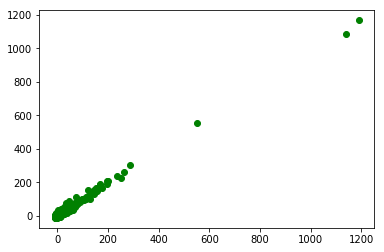

In [70]:
pt.scatter(y_test,y_pred,color='Green')
#pt.legend('Line')

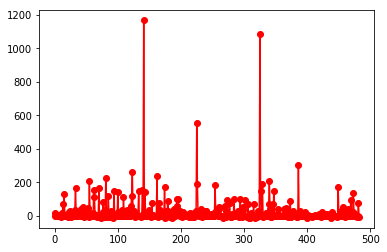

In [66]:
pt.plot(y_pred,'r-o')

In [39]:
#t=sn.load_dataset("E:\\ebooks CSE\\flight")

Text(0.5, 0, 'y_pred')

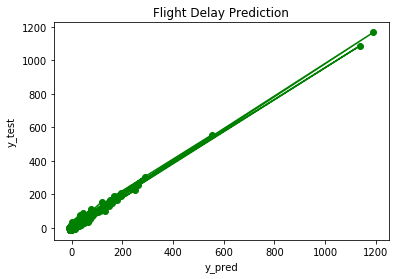

In [72]:
pt.plot(y_test,y_pred,'g-o')
pt.title("Flight Delay Prediction")
pt.ylabel("y_test")
pt.xlabel("y_pred")

In [89]:
print(project.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


In [90]:
%matplotlib inline

In [97]:
#pt.plot(x_test['Arrival_Delay'],y_test,'-', x_test['Arrival_Delay'],y_pred,'*')

In [98]:
d=pa.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d.head(10)

,Actual,Predicted
4767,-5,-3.687997
3708,30,17.047118
1447,10,4.265626
4019,1,-0.059242
3225,-6,-4.187491
372,-7,-4.260762
1202,-5,-4.176541
755,8,-0.348303
2245,-7,-4.683446
4073,2,5.656521


In [95]:
x_train.shape

(4338, 18)

In [98]:
y_train.shape

(4338,)

In [89]:
#pt.scatter(y_test, y_pred, color = 'red')
#pt.plot(y_test,y_pred,color='green')

In [41]:
c=np.mean(project.coef_)
s=project.intercept_
c,s

(-0.08589583639689463, -0.3439835433691627)

In [52]:
regression_line = []
for x in y_test:
    regression_line.append((s*x)+c)

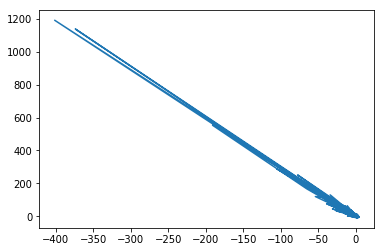

In [50]:
pt.plot(regression_line,y_test)

In [63]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_pred, y_test)
print('Linear Regression Mean Absolute Error : %.4f' % error)

Linear Regression Mean Absolute Error : 6.0302


In [53]:
'''from sklearn.linear_model import Lasso,Ridge

from y import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data '''

ModuleNotFoundError: No module named 'yellowbrick'

In [59]:
#pt.plot(y_test,y_pred,color='g')
pt.draw()

<Figure size 432x288 with 0 Axes>

In [52]:
#pt.scatter(y_test, y_pred, color = "m", marker = "o", s = 100)                

In [18]:
score=[]
for i in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression().fit(x_train,y_train)
    score.append(lr.score(x_test,y_test))
I=score.index(np.max(score)) 

In [19]:
I

1060